# Foundations of Data Mining: Assignment 4

- Group: 
- Students:  () / Jiyang Li (0975662) 


In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

## Backpropagation (3 points)

**Solution**


- We choose Loss function: 
    - $L(x, y; w) = \frac{1}{2}(o_\theta - y)^2$ 
- $\phi$ is ReLU=max(q,0) here

- Forward 1:
$$r=\phi (q_0)=\phi(w_0x_0)=1$$
$$o=\phi(q_1)=\phi(w_1r)=2$$

- Backward 1:
$$w_1=w_1-\alpha \frac{\partial L}{\partial w_1}=w_1-\alpha \frac{\partial L}{\partial o}\frac{\partial o}{\partial q_1}\frac{\partial q_1}{\partial w_1}=w_1-\alpha\cdot x_0(o-y_0)=2-0.1*1*0=2$$

$$w_0=w_0-\alpha \frac{\partial L}{\partial w_0}=w_0-\alpha \frac{\partial L}{\partial o}\frac{\partial o}{\partial w_0}=w_0-0=1$$

Since $o_\theta=y$ for first point, weights don't update.


- Forward 2:
$$r=\phi(q_0)=\phi(w_0x_1)=2$$
$$o=\phi(q_1)=\phi(w_1r)=4$$


- Backward 2:
$$w_1=w_1-\alpha \frac{\partial L}{\partial w_1}=w_1-\alpha \frac{\partial L}{\partial o}\frac{\partial o}{\partial q_1}\frac{\partial q_1}{\partial w_1}=w_1-\alpha\cdot x_1(o-y_1)=2-0.1*2*1=1.8$$
$$w_0=w_0-\alpha \frac{\partial L}{\partial w_1}\frac{\partial w_1}{\partial w_0}=w_0-\alpha \frac{\partial L}{\partial q_1}\frac{\partial q_1}{\partial r}\frac{\partial r}{\partial q_0}\frac{\partial q_0}{\partial w_0}=w_0-\alpha *x_1*w_1(o-y_1)=0.6$$

$o_\theta\neq y$ for second point, so weights update after backpropagation.

## Training Deep Models (3 points)

In [3]:
# (You don't need to change this part of the code)
from __future__ import print_function
import numpy as np
np.random.seed(1234)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


import matplotlib.pyplot as plt

batch_size = 128
nb_classes = 10
nb_epoch = 3

In [4]:
# (You don't need to change this part of the code)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


In [11]:

Y_train.shape

(60000, 10)

In [4]:
def def_model(number_hidden_layers, activation):
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation=activation))
    model.add(Dropout(0.2))
    
    while number_hidden_layers > 1:
        model.add(Dense(512))
        model.add(Activation(activation))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1


    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
   
    history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    return score, history

In [5]:
def run_model(activation):
    for n, depth in enumerate([1,2,3]):
        score, history = def_model(depth,activation)
        
        print('Test score:', score[0])
        print('Test accuracy:', score[1])

        plt.subplot(1,3,n)
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 9s - loss: 1.9769 - acc: 0.3657 - val_loss: 1.5847 - val_acc: 0.7156

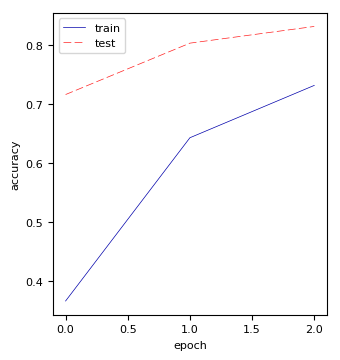

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 15s - loss: 2.3255 - acc: 0.1234 - val_loss: 2.2299 - val_acc: 0.3521

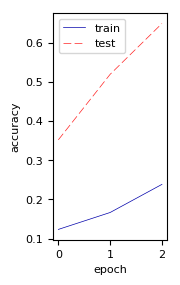

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 18s - loss: 2.3593 - acc: 0.1040 - val_loss: 2.2965 - val_acc: 0.1059

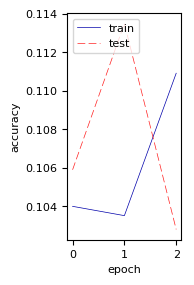

In [6]:
plt.figure(figsize=(12, 4)); 
run_model('sigmoid')
plt.show();


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s - loss: 2.3279 - acc: 0.1206 - val_loss: 2.2290 - val_acc: 0.1760

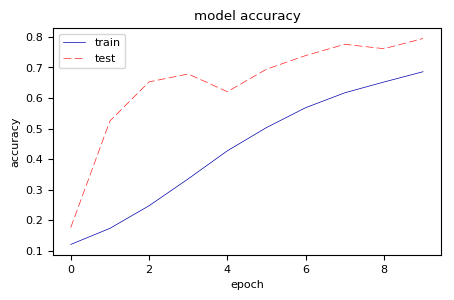

In [12]:
# Training (You don't need to change this part of the code)
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Convolutional Neural Networks for Filtering (2 points)

**Solution**

- The definition of the architecture of the CNN
 - two layers of CNN
 - Three filters for first layer and one filter for the next layer
 - The shape of fiters are 3 conv 3x1x1 and 3x5x5 
 

Answer:

We define 4 layers, which includes the input layer, output layer and two hidden layers respect to sepia filter and Gaussian smoothing filter.

The image consists of $128\times128$ pixels. The color of each point is defined by a 3D vector represents the R G B values repectively. The sepia layer produced by a $1\times Conv.\times1\times1\times3$ convolution. The neuron computes the RGB values with the defined sepia filter. For example, the neuron to compute the R value is like below:

$P'(i,j)_r=(R_{ij} * .393) + (G_{ij} *.769) + (B_{ij} * .189)$  $i,j$ from 1 to 128.

The Gaussian layer is produced by a $1\times Conv.\times5\times5\times3$ convolution. Like the sepia layer, the neuron computes the blurring effect for the three RGB values respectively. The size of the filter is $5\times5$, the padding is 0 and the stride is 1. So the size of the output image is $124\times124$.

As a discretized version of the filter is given, which can be represent by a matrix like below:
$G = 1/273\times 
\begin{bmatrix}
    1 & 4 & 7 & 4 & 1 \\
    4 & 16 & 26 & 16 & 4 \\
    7 & 26 & 41 & 26 & 7 \\
    4 & 16 & 26 & 16 & 4 \\
    1 & 4 & 7 & 4 & 1 \\
\end{bmatrix}
$

Below shows how to apply the effect to the three RGB values:

$P''(i,j)=\sum_{m=1}^{5}\sum_{n=1}^{5} P'(i+m-1,j+n-1)_r\times G(m,n)$  ($i,j$ from 1 to 124).


- The definition of the architecture of the CNN:
  - Number of the layers:
  The number of layers is 4, which includes the input layer, the sepia layer, Gaussian blurring layer and output layer.
  - Number of filters of sepia layer is 3, number of filters of Gaussian layer is 1.
  - Shape of sepia filter : $1\times1\times3$, shape of Gaussian filter: $5\times5\times3$
- Padding size: 0, Stride: 1
- Dimension of the out put image: $124\times124$
  

## Model Design (2 Points)

## MNIST Calculator (5 points)


In [5]:
# Imports
from __future__ import print_function
from keras.models import Sequential
from keras.engine.training import _slice_arrays
from keras.layers import Activation, TimeDistributed, Dense, RepeatVector, recurrent
import numpy as np
from six.moves import range

In [6]:
class CharacterTable(object):
    '''
    Given a set of characters:
    + Encode them to a one hot integer representation
    + Decode the one hot integer representation to their character output
    + Decode a vector of probabilities to their character output
    '''
    def __init__(self, chars, maxlen):
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))
        self.maxlen = maxlen

    def encode(self, C, maxlen=None):
        maxlen = maxlen if maxlen else self.maxlen
        X = np.zeros((maxlen, len(self.chars)))
        for i, c in enumerate(C):
            X[i, self.char_indices[c]] = 1
        return X

    def decode(self, X, calc_argmax=True):
        if calc_argmax:
            X = X.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in X)


class colors:
    ok = '\033[92m'
    fail = '\033[91m'
    close = '\033[0m'

In [7]:
# Parameters for the model and dataset
TRAINING_SIZE = 5000
DIGITS = 10
INVERT = True
# Try replacing GRU, or SimpleRNN
#RNN = recurrent.LSTM
RNN = recurrent.SimpleRNN
HIDDEN_SIZE = 128
BATCH_SIZE = 128
LAYERS = 1
MAXLEN = DIGITS + 1 + DIGITS

chars = '0123456789+ '
ctable = CharacterTable(chars, MAXLEN)

questions = []
expected = []
seen = set()
print('Generating data...')
while len(questions) < TRAINING_SIZE:
    f = lambda: int(''.join(np.random.choice(list('0123456789')) for i in range(np.random.randint(1, DIGITS + 1))))
    a, b = f(), f()
    # Skip any addition questions we've already seen
    # Also skip any such that X+Y == Y+X (hence the sorting)
    key = tuple(sorted((a, b)))
    if key in seen:
        continue
    seen.add(key)
    # Pad the data with spaces such that it is always MAXLEN
    q = '{}+{}'.format(a, b)
    query = q + ' ' * (MAXLEN - len(q))
    ans = str(a + b)
    # Answers can be of maximum size DIGITS + 1
    ans += ' ' * (DIGITS + 1 - len(ans))
    if INVERT:
        query = query[::-1]
    questions.append(query)
    expected.append(ans)
print('Total addition questions:', len(questions))

print('Vectorization...')
X = np.zeros((len(questions), MAXLEN, len(chars)), dtype=np.bool)
y = np.zeros((len(questions), DIGITS + 1, len(chars)), dtype=np.bool)
for i, sentence in enumerate(questions):
    X[i] = ctable.encode(sentence, maxlen=MAXLEN)
for i, sentence in enumerate(expected):
    y[i] = ctable.encode(sentence, maxlen=DIGITS + 1)

# Shuffle (X, y) in unison as the later parts of X will almost all be larger digits
indices = np.arange(len(y))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Explicitly set apart 10% for validation data that we never train over
split_at = int(len(X) - len(X) / 10)
(X_train, X_val) = (_slice_arrays(X, 0, split_at), _slice_arrays(X, split_at))
(y_train, y_val) = (y[:split_at], y[split_at:])

print(X_train.shape)
print(y_train.shape)


Generating data...
Total addition questions: 5000
Vectorization...
(4500, 21, 12)
(4500, 11, 12)


In [8]:
print('Build model...')
model = Sequential()
# "Encode" the input sequence using an RNN, producing an output of HIDDEN_SIZE
# note: in a situation where your input sequences have a variable length,
# use input_shape=(None, nb_feature).
model.add(RNN(HIDDEN_SIZE, input_shape=(MAXLEN, len(chars))))
# For the decoder's input, we repeat the encoded input for each time step
model.add(RepeatVector(DIGITS + 1))
# The decoder RNN could be multiple layers stacked or a single layer
for _ in range(LAYERS):
    model.add(RNN(HIDDEN_SIZE, return_sequences=True))

# For each of step of the output sequence, decide which character should be chosen
model.add(TimeDistributed(Dense(len(chars))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [9]:
# Train the model each generation and show predictions against the validation dataset
for iteration in range(1, 200):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=1,
              validation_data=(X_val, y_val))
    ###
    # Select 10 samples from the validation set at random so we can visualize errors
    for i in range(10):
        ind = np.random.randint(0, len(X_val))
        rowX, rowy = X_val[np.array([ind])], y_val[np.array([ind])]
        preds = model.predict_classes(rowX, verbose=0)
        q = ctable.decode(rowX[0])
        correct = ctable.decode(rowy[0])
        guess = ctable.decode(preds[0], calc_argmax=False)
        print('Q', q[::-1] if INVERT else q)
        print('T', correct)
        print(colors.ok + '☑' + colors.close if correct == guess else colors.fail + '☒' + colors.close, guess)
        print('---')


--------------------------------------------------
Iteration 1
Train on 4500 samples, validate on 500 samples
Epoch 1/1
4500/4500 [==============================] - 3s - loss: 1.8442 - acc: 0.3800 - val_loss: 1.6296 - val_acc: 0.4242

KeyboardInterrupt: 